In [14]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch,Rectangle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d

plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt

from scipy.integrate import quad,dblquad

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Announcements

  - No quiz this week.
    - But **do** attend recitation
    - This stuff isn't easy.
  - Homework 10 due **Tuesday**.
  - Exam 2
    - Stronger results (as predicted)
    - Scores released.
    
    

# One-minute Review

Which of the following fields is conservative?

  1. $x\,\vec i$
  1. $x\,\vec j$
  1. Both.
  1. Neither.

# Lecture 19

  - Objectives
    - Line Integrals

  - Resources
    - Content
      - Stewart: §16.1–3
      - New Strang:  
        - [§6.2](https://openstax.org/books/calculus-volume-3/pages/6-2-line-integrals)
      - [Slides](https://hub.columbiajupyter2.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdrewyoungren%2Fmvc-f19&urlpath=tree%2Fmvc-f19%2Fslides%2Fmvc-L19.ipynb) via JupyterHub
    - Practice
      - Mooculus: [Line Integrals](https://ximera.osu.edu/mooculus/calculus3/lineIntegrals/digInLineIntegrals)
    - Extras
      - CalcBLUE: [Path Integrals](https://www.youtube.com/watch?v=8333W0vsqBc&list=PL8erL0pXF3JYCn8Xukv0DqVIXtXJbOqdo&index=9) 

### A quick note on integrals

Every integral has three essential parts, summarized as the "where", the "what", and the "how".

$$\int_D F\,d\omega $$

  - Where? the domain of integration $D$

  - What? the integrand $F$

  - How? the differential (form) $d\omega$

We'll be seeing a lot of different integrals in vector calculus, you can keep yourself oriented by thinking about each of these for every integral we encounter.

# Line Integrals

A **line integral**, also called a **path integral**, is an integral whose domain of integration is $C$, the _image_ of a curve parametrized by $\vec r(t)$.  

They come in different "flavors" based on the integrand and the differential, but all have a domain of integration that is a path in space.

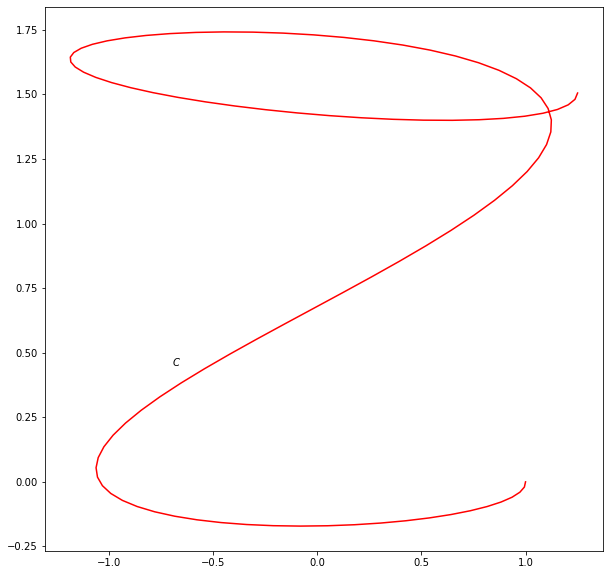

In [15]:
r = lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2])
t = np.linspace(0,1,100)
plt.plot(*r(t),'-r')
plt.text(-.7,.45,"$C$");

## Line integrals w/ respect to arc length

$$\int_C f\,ds$$

  - Where? path in space $C$
  - What? scalar field $f(x,y,\ldots)$
  - How? w.r.t. arc length $ds$

**Interpretation**: One way to think of this quantity is as the area of a wall built over $C$ with height given by $f$.

In [16]:
r = lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2])
f = lambda x,y: x**2 + y**2/4
t = np.linspace(0,1,100)

@interact(angle=(-108,66,6),s=(0.,1,.05))
def _(angle=-24,vangle=(0,90,6),s=0,
     r=fixed(lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2])),
     f=fixed(lambda x,y: x**2 + y**2/4),
     t=fixed(np.linspace(0,1,100))):
    fig = plt.figure(figsize=(10,10))
    ax= fig.add_subplot(111,projection='3d')
    u = np.linspace(-1,1,100) 
    v = np.linspace(-1,2,100) 
    w = np.linspace(0,s,77)
    w,z = np.meshgrid(w,np.linspace(0,1,50))
    U,V = np.meshgrid(u,v)
    ax.plot_surface(U,V,f(U,V),alpha=.4)
    ax.plot_surface(*r(w),z*f(*r(w)),color='r')
    ax.plot(*r(t),np.zeros_like(t),'-r')
    ax.view_init(vangle,angle)


    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(IntSlider(value=-24, description='angle', max=66, min=-108, step=6), IntSlider(value=42,…

## Formula

$$\int_C f\,ds \approx \sum_{i=1}^n f(x_i^*,y_i^*)\,\Delta s_i$$

where $\Delta s_i = \sqrt{\Delta x_i^2 + \Delta y_i^2}$. 

To compute this, we need a **parametrization** for $C$. That is, a space curve $\vec r(t) = x(t)\,\vec i +  y(t)\,\vec j$ for $a \leq t \leq b$. Then this becomes in the limit

$$\int_C f\,ds = \int_a^b f(x(t),y(t)) |\vec r'(t)| dt.$$

## Line integral with respect to a coordinate

$$\int_C f\,dx \qquad \text{ or } \qquad \int_C f\,dy$$

  - Where? path in space $C$
  - What? scalar field $f(x,y,\ldots)$
  - How? w.r.t. to coordinate $dx$ (or $dy$ or ...)

## Formula

$$\int_C f\,dx \approx \sum_{i=1}^n f(x_i^*,y_i^*)\,\Delta x_i$$

where $\Delta x_i$ can be positive or negative. 

To compute this, we need a **parametrization** for $C$. That is, a space curve $\vec r(t) = x(t)\,\vec i +  y(t)\,\vec j$ for $a \leq t \leq b$. Then this becomes in the limit

$$\int_C f\,dx = \int_a^b f(x(t),y(t)) \,x'(t)\, dt.$$

$$\int_C f\,dy = \int_a^b f(x(t),y(t))\, y'(t)\, dt.$$

**Interpretation**: This is more abstract. We accumulate products of the integrand with the change in a particlular direction along a path.

The same function and curve are shown with representations of the integral with respect to 
  - $ds$ (red)
  - $dx$ (blue)
  - $dy$ (green)

In [17]:
# r = lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2])
# f = lambda x,y: x**2 + y**2/4
# t = np.linspace(0,1,100)

@interact(angle=(-108,66,6),s=(0.,1,.05))
def _(angle=-24,vangle=(0,90,6),s=0,surf=False,
      r=fixed(lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2])),
      f = fixed(lambda x,y: x**2 + y**2/4),
      t = fixed(np.linspace(0,1,100))):
    fig = plt.figure(figsize=(10,10))
    ax= fig.add_subplot(111,projection='3d')
    u = np.linspace(-1,1,100) 
    v = np.linspace(-1,2,100) 
    w = np.linspace(0,s,77)
    w,z = np.meshgrid(w,np.linspace(0,1,50))
    U,V = np.meshgrid(u,v)
    if surf:
        ax.plot_surface(U,V,f(U,V),alpha=.4)
    ax.plot_surface(*r(w),z*f(*r(w)),color='r',alpha=1)

    ax.plot_surface(r(w)[0,:],0*w - 1,z*f(*r(w)),color='b',alpha=.5)
    ax.plot_surface(0*w - 1.2,r(w)[1,:],z*f(*r(w)),color='g',alpha=.5)
    ax.plot(*r(t),np.zeros_like(t),'-r')
    ax.view_init(vangle,angle)

    ax.set_xlim([-1.2,1.2])
    ax.set_ylim([-1,2])
    ax.set_zlim([0,2.2])
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(IntSlider(value=-24, description='angle', max=66, min=-108, step=6), IntSlider(value=42,…

## Line integral of a vector field

$$\int_C \vec F\cdot d\vec r$$

  - Where? path in space $C$
  - What? vector field $\vec F(x,y,\ldots)$
  - How? w.r.t. to direction of line $d\vec r$

**Interpretation**: This quantity measures how much the vector field $\vec F$ pushes along the path $C$ (which must be oriented).

  - If $\vec F$ is a force, and $C$ is the path of an object, the line integral is the work done by the force on the object.
  - Consider the [question](https://en.wikipedia.org/wiki/Wind_assistance#Road_running) of whether a marathon run was "wind-assisted."

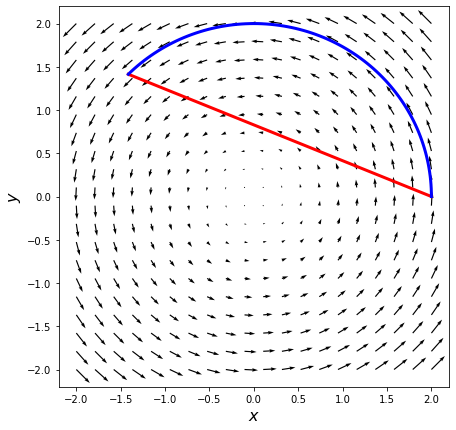

In [18]:
x = y = np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,-y,x);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.plot(2*cos(t*3*pi/4),2*sin(t*3*pi/4),'b',lw=3);

## Formula

$$\int_C \vec F\cdot d\vec r \approx \sum_{i=1}^n \vec F(x_i^*,y_i^*)\cdot\langle \Delta x_i,\Delta y_i\rangle$$

where $\Delta x_i, \Delta y_i$ can be positive or negative. 

To compute this, we need a **parametrization** for $C$. That is, a space curve $\vec r(t) = x(t)\,\vec i +  y(t)\,\vec j$ for $a \leq t \leq b$. Then this becomes in the limit

$$\int_C \vec F\cdot d\vec r = \int_a^b \vec F(\vec r(t)) \cdot \vec r'(t)\, dt.$$

If $ \vec F(x,y) =  P(x,y)\,\vec i +  Q(x,y)\,\vec j $, then this becomes
$$ \int_a^b \vec F(x(t),y(t)) \cdot \langle x'(t),y'(t) \rangle\, dt = \int_C P\, dx + Q\,dy.$$

If $ \vec T(t) = \frac{\vec r'(t)}{|\vec r'(t)|}$ is the usual unit tangent vector in the direction of the curve., then this becomes
$$ \int_a^b \vec F(\vec r(t)) \cdot \vec T(t)\,|\vec r'(t)|\, dt = \int_C \vec F\cdot\vec T \,ds.$$